In [1]:
import numpy as np
from scipy import constants
from scipy.optimize import leastsq

Molar masses

In [2]:
N0 = 70
M = {
    'P':31, 'N':14, 'C':12, 'O':8, 'H':1, 
    'F':19, 'Cl':35.5, 'Br':80, 'I':127}
M['head_Ph'] = 6 * M['C'] + 5 * M['O'] + 10 * M['H'] + M['P']
M['head_Et'] = 6 * M['C'] + 2 * M['O'] + 11 * M['H']
M['monoBr'] = 5 * M['C'] + 2 * M['O'] + 7 * M['H'] + M['Br']
M['Imidazolium'] = 4 * M['C'] + 6 * M['H'] + 2 * M['N']
M['Pyrrolidinium'] = 5 * M['C'] + 11 * M['H'] + M['N']
for short, full in [('Im', 'Imidazolium'), ('Pyr', 'Pyrrolidinium')]:
    for X in ['F','Cl','Br','I']:
        M['P'+short+X] = M['head_Ph'] + N0 * (M['monoBr'] + M[full] - M['Br'] + M[X])
        M['P'+short+X+'_Et'] = M['head_Et'] + N0 * (M['monoBr'] + M[full] - M['Br'] + M[X])

In [3]:
M

{'Br': 80,
 'C': 12,
 'Cl': 35.5,
 'F': 19,
 'H': 1,
 'I': 127,
 'Imidazolium': 82,
 'N': 14,
 'O': 8,
 'P': 31,
 'PImBr': 17303,
 'PImBr_Et': 17249,
 'PImCl': 14188.0,
 'PImCl_Et': 14134.0,
 'PImF': 13033,
 'PImF_Et': 12979,
 'PImI': 20593,
 'PImI_Et': 20539,
 'PPyrBr': 17513,
 'PPyrBr_Et': 17459,
 'PPyrCl': 14398.0,
 'PPyrCl_Et': 14344.0,
 'PPyrF': 13243,
 'PPyrF_Et': 13189,
 'PPyrI': 20803,
 'PPyrI_Et': 20749,
 'Pyrrolidinium': 85,
 'head_Et': 99,
 'head_Ph': 153,
 'monoBr': 163}

From now on, in dissociation order: PImBr, PImI, PPyrCl, PPyrBr, PPyrI

Measured $G'(\gamma \rightarrow 0)$ at $f=1$ Hz, and critical strain $\gamma_c$ such that $G''$ is maximum.

In [4]:
G = np.array([13, 78, 270, 9800, 8800])
gamma_c = np.array([8.04, 0.16, 0.09, 0.016, 0.04])

Monomer number density for a weight fraction of 80 g/kg

In [5]:
w = 80
c = N0 * constants.N_A / np.array([M[s] for s in ['PImBr', 'PImI', 'PPyrCl', 'PPyrBr', 'PPyrI']]) * 80 * 1000

## Cross-linked gel

The shear modulus of a cross-linked gel is given by:
$$G = \frac{c}{N}k_\mathrm{B}T,$$
with $N$ the number of monomers between cross-links. Conversly, we can get the number $n = N/N_0$ of chains between cross-links:

In [6]:
T = constants.C2K(25)
n = c/N0 * constants.k * T / G
print(n)

[ 881.64591775  123.46524964   51.01442873    1.15550635    1.08330393]


If head-to-body bonds break within the linear regime of the chain, the bonding energy can be deduced from the critical strain:
$$\frac{E_c}{k_\mathrm{B}T} = \gamma_c^2$$

In [7]:
print(gamma_c**2)

[  6.46416000e+01   2.56000000e-02   8.10000000e-03   2.56000000e-04
   1.60000000e-03]


Only PImBr has $E_c>k_\mathrm{B}T$. In kJ/mol:

In [8]:
gamma_c[0]**2 * constants.k * T * constants.N_A / 1000

160.24373961475197

In abscence of salt, the screening length is
$$r_\mathrm{scr} = \left(\frac{B}{cb}\right)^{1/2}$$
where $b\approx 0.26$ nm is the monomer size and
$$B = b\frac{g_e}{D} = b\frac{g_\mathrm{src}}{r_\mathrm{src}}$$
describes the electrostatic blob of diameter $D$ containing $g_e$ monomers. Between $D$ and $r_\mathrm{scr}$ the polyelectrolyte is a linear assembly of electrostatic blobs, thus
$$g_\mathrm{src} = g_e \frac{r_\mathrm{src}}{D} = \left(\frac{B^3}{cb^3}\right)^{1/2}$$.

The exit from the linear domain of the material corresponds to the full extension of the persistent random walk:
$$\gamma_c = \frac{R_0}{R} - 1,$$
with
$$\left. \begin{array}{ll}
R &= r_\mathrm{scr} \left(\frac{N}{g_\mathrm{scr}}\right)^{1/2}\\
R_0 &= r_\mathrm{scr} \frac{N}{g_\mathrm{scr}}
\end{array}\right\rbrace\quad
\gamma_c = \left(\frac{N}{g_\mathrm{scr}}\right)^{1/2} -1
$$

Finally
$$B = \left(b^3 c \frac{N^2}{(\gamma_c+1)^4}\right)^{1/3}$$

In [9]:
b = 0.26e-9
B = b * (c * (n*N0)**2 / (gamma_c+1)**4)**(1/3)
print('PImI', 'PPyrCl', 'PPyrBr', 'PPyrI', sep='\t')
print(B[1:])

PImI	PPyrCl	PPyrBr	PPyrI
[ 49.15084602  33.3793336    2.74929576   2.41045374]


PImBr is set aside because head-to-body link broke before full extension of the persistent random walk.

From $B$ and provided an assumption on the $\Theta$-temperature, we can deduce the number $A$ of monomers between dissociated charges. If $A=1$, there is no counterion condensation and the polyelectrolyte is fully charged.
$$B = \left(\frac{A^2}{u}\right)^{2/3}\tau \Leftrightarrow A = u^{1/2} \left(\frac{B}{\tau}\right)^{3/4}$$
where $u = b/\ell_\mathrm{B}$, with $\ell_\mathrm{B} = 0.7$ nm the Bjerrum length in water and $\tau = 1-T/\Theta$ the reduced temperature. We know that $\Theta>100$C so $0.2<\tau<1$.

In [10]:
lB = 0.7e-9
u = lB/b
tau = 0.2
A = u**(1/2) * (B/tau)**(3/4)
print('PImI', 'PPyrCl', 'PPyrBr', 'PPyrI', sep='\t')
print(A[1:])

PImI	PPyrCl	PPyrBr	PPyrI
[ 101.84462127   76.19002143   11.71401959   10.61363017]


Is it possible to have $A>N_0$?

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

132.63040382 2.06993519599
280.773124133


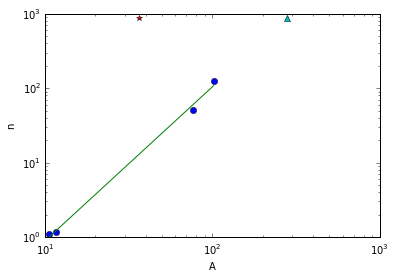

In [12]:
plt.plot(A[1:], n[1:], 'o')
params = leastsq(
    lambda p,x,y: p[0] + p[1]*x - y,
    [0,2],
    args=(np.log(A[1:]), np.log(n[1:]))
    )[0]
print(np.exp(-params[0]), params[1])
plt.plot(A[1:], np.exp(params[0]) * A[1:]**params[1])
plt.plot(A[0], n[0], '*')
print((n[0]/np.exp(params[0]))**(1/params[1]))
plt.plot((n[0]/np.exp(params[0]))**(1/params[1]), n[0], '^')
plt.xlabel('A')
plt.ylabel('n')
plt.xscale('log')
plt.yscale('log')

## Lower bound for $\tau$

for the polymer to be soluble, we want at least a charge per polymer, or $A<N_0$ that yields
$$\tau > \left(\frac{n u}{N_0}\right)^{2/3} \frac{c^{1/3}b}{(\gamma_c+1)^{4/3}}$$

In [13]:
(n*u/N0)**(2/3) * c**(1/3) * b /(gamma_c+1)**(4/3)

array([ 0.08386264,  0.32972363,  0.22392199,  0.01844338,  0.01617029])

In [14]:
lB = 0.7e-9
u = lB/b
tau = 0.33
A = u**(1/2) * (B/tau)**(3/4)
print('PImI', 'PPyrCl', 'PPyrBr', 'PPyrI', sep='\t')
print(A[1:])

PImI	PPyrCl	PPyrBr	PPyrI
[ 69.95602742  52.33414551   8.0462401    7.29039387]


In the case $\tau=0.33$, how many monomoers are contained in an electrostatic blob ?
$$g_e = \left(\frac{B^3}{\tau}\right)^{1/2}$$

In [15]:
(B**3/0.33)**(1/2)

array([  76.94266277,  599.8456676 ,  335.70632437,    7.93551695,
          6.51465217])

Or in number of chains per electrostatic blobs

In [16]:
(B**3/0.33)**(1/2)/N0

array([ 1.0991809 ,  8.56922382,  4.79580463,  0.11336453,  0.09306646])

Number of chains in a correlation blob

In [17]:
(B**3/c/b**3)**(1/2)/N0

array([ 10.78840744,  91.75479313,  42.93782403,   1.11939902,   1.00157538])

In [18]:
n/((B**3/c/b**3)**(1/2)/N0)

array([ 81.7216  ,   1.3456  ,   1.1881  ,   1.032256,   1.0816  ])

We know that PImBr has even less charges than than PImI, therefore a larger $A$ and a larger $B$.

$$B(\mathrm{PImBr}) > B(\mathrm{PImI}) 
\Leftrightarrow \frac{c^{1/4} n^{1/2}}{R_0/R}(\mathrm{PImBr}) > \frac{c^{1/4} n^{1/2}}{\gamma_c+1}(\mathrm{PImI})
\Leftrightarrow \frac{R_0}{R}(\mathrm{PImBr}) < \frac{c^{1/4} n^{1/2}(\mathrm{PImBr})}{c^{1/4} n^{1/2}(\mathrm{PImI})}(\gamma_c(\mathrm{PImI})+1)$$

In [19]:
(c[0]/c[1])**(1/4) * (n[0]/n[1])**(1/2) * (gamma_c[1]+1)

3.2376677043122615

Instead of $\gamma_c+1 = 9$.

Actually, to get the equality we need 
$$\frac{n_\mathrm{PImBr}}{n_\mathrm{PImI}} = \left(\frac{c_\mathrm{PImBr}}{c_\mathrm{PImI}}\right)^{1/2} \left(\frac{\gamma_{c,\mathrm{PImBr}}+1}{\gamma_{c,\mathrm{PImI}}+1}\right)^2 \approx \left(\frac{\gamma_{c,\mathrm{PImBr}}+1}{\gamma_{c,\mathrm{PImI}}+1}\right)^2 \approx 81$$ 
and we only have 7.

In [20]:
n[0]/n[1]

7.1408426284459336

Thinking in terms of fractal dimension, we need an aggregate of dimension $d$ so that

$$\left(\frac{n_\mathrm{PImBr}}{n_\mathrm{PImI}}\right)^d = \left(\frac{c_\mathrm{PImBr}}{c_\mathrm{PImI}}\right)^{1/2} \left(\frac{\gamma_{c,\mathrm{PImBr}}+1}{\gamma_{c,\mathrm{PImI}}+1}\right)^2$$

In [21]:
(np.log(c[0]/c[1]) + 2*np.log(n[0]/n[1]))/np.log((gamma_c[0]+1) / (gamma_c[1]+1)) /2

0.99981846876862512

In [22]:
from scipy.stats import binom, poisson

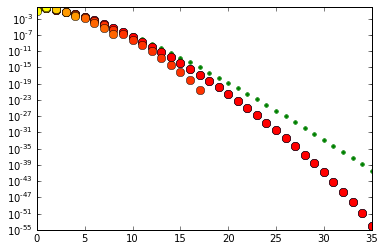

In [37]:
plt.plot(binom.pmf(np.arange(N0/2+1), N0/2, 2/N0), 'bo', ms=8, label='binom pmf')
plt.plot(poisson.pmf(np.arange(N0/2+1), 1), 'g.', ms=8, label='binom pmf')
for i,a in enumerate(2**np.arange(6)):
    plt.plot(binom.pmf(np.arange(N0/a/2+1), N0/a/2, 2*a/N0), 'o', color=plt.cm.autumn(i/5.), ms=8, label='binom pmf')
plt.yscale('log')

If the electrostatic blob cannot contain even the shortest side chain, then every side chain sticks out and thus the branching counts as a cross link. The precise boundary is when the electrostatic blob contains the main chain and a single monomeric side chain $ge<2N_0$. This translates in a condition on $A$ (provided $\tau$):
$$A < A_1 = \left(\frac{2N_0 u}{\tau}\right)^{1/2}$$.

In [25]:
(2*N0*u/np.array([0.2,tau,0.5,1]))**(1/2)

array([ 43.41215711,  33.79631847,  27.45625892,  19.41450687])

Since there is exactly one head per body, the average number of heads attached to a given body is 1. The probability to have a head attached to a monomer is thus $1/N_0$. The probability of having a given number of monomers between crosslinks is thus given by a geometric distribution of parameter $1/N_0$. The average number of monomers between crosslinks is thus $N_0$. Therefore $n=k=1$.

If $A>A_1$, monomeric side chains are able to fully collapse on the main chain and thus do not count as cross-link anymore. The probability to have a crosslink is thus the probability to have a side chain AND that this side chain is not monomeric.

Let us suppose that the probability of attaching a head to a given body is ndependent of the number of heads already attached, with a maximum of $N_0/2A$ heads per body (bivalent phosphonate head need two monovalent cationic groups to attach, and ony $N_0/A$ are available). The probability $P(h)$ of having $h$ heads attached to the same body is thus given by a binomial law of mean 1. The probability to have no head attached and thus a tail is 
$$P(h=0) = \left(1-\frac{2A}{N_0}\right)^{N_0/2A}$$

In [53]:
def P(h,A=1): 
    return binom.pmf(h, N0/2/A, 2*A/N0)
P(0)

0.36256054767581464

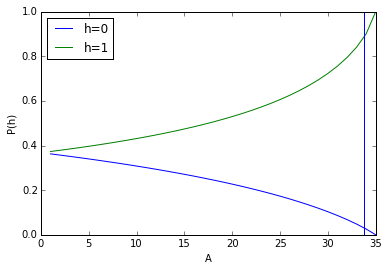

In [55]:
plt.plot(range(1,N0//2+1), [P(0, a) for a in range(1,N0//2+1)], label='h=0')
plt.plot(range(1,N0//2+1), [P(1, a) for a in range(1,N0//2+1)], label='h=1')
plt.xlabel('A')
plt.ylabel('P(h)')
plt.legend(loc='upper left')
plt.axvline((2*N0*u/tau)**(1/2))

The probability for a given monomer to hold a crosslink is thus
$$\frac{1-P(h=0)}{N_0}$$
The number of monomers betwenn crosslinks is the inverse of the latter. Finally, the number of chains between crosslinks is 
$$n = \frac{1}{1-P(h=0)}$$

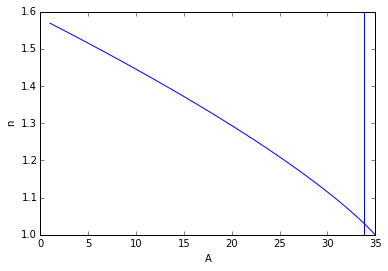

In [56]:
plt.plot(range(1,N0//2+1), [1/(1-P(0, a)) for a in range(1,N0//2+1)])
plt.xlabel('A')
plt.ylabel('n')
plt.axvline((2*N0*u/tau)**(1/2))

In [27]:
1/(1-P(0))

1.5687764482632396

There is also a threshold $A_2 = \left(\frac{3N_0 u}{\tau}\right)^{1/2}$ when a dimeric side chains can collapse on the main chain. For $A>A_2$
$$n = \frac{1}{1-P(h=0)-P(h=1)P(h=0)}$$

In [28]:
1/(1-P(0) - P(0)*P(1))

1.9915434258974904

For $A>A_3$
$$n = \frac{1}{1 - P(h=0) - P(h=1)\left(P(h=0)+P(h=1)P(h=0)\right) - P(h=2)P(h=0)^2}$$

In [29]:
1/(1 - P(0)*(1 + P(1) + P(1)**2) - P(0)**2*P(2)*(1+2*P(1)))

2.4463089358439283

In [30]:
1/(1 - P(0)*(1 + P(1) + P(1)**2 + P(1)**3) - P(0)**2*P(2)*(1+2*P(1)+3*P(1)**2) - P(0)**3*P(3))

2.6539150687299284

A single head attached and thus a linear procession has probability of P(h=1)

In [31]:
binom.pmf(1, N0/2, 2/N0)

0.37322409319569066

And the probability to branch is $P(h\geq 2)$

In [32]:
1 - np.sum(binom.pmf([0,1], N0/2, 2/N0))

0.2642153591284947

Therefore, the number of chains beween cross links n=k is

In [33]:
1/(1-np.sum(binom.pmf([0,1], N0/2, 2/N0)))

3.7847913281743564

More complete expression taking into account the probability to have a second branching (third head) on the same 
$$\frac{P(h=2) \times 1/P(h\geq 2) + P(h>3)}{P(h\geq 2)}$$

In [34]:
(binom.pmf(2, N0/2, 2/N0) / (1-np.sum(binom.pmf([0,1], N0/2, 2/N0))) + (1-np.sum(binom.pmf([0,1,2], N0/2, 2/N0)))) / (1-np.sum(binom.pmf([0,1], N0/2, 2/N0)))

2.9668637387798635

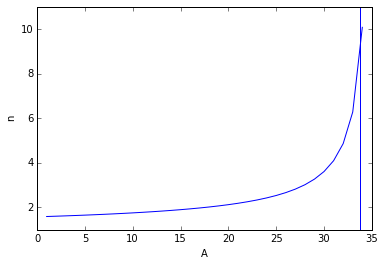

In [59]:
plt.plot(range(1,N0//2), [1/(1-P(1,a)) for a in range(1,N0//2)])
plt.xlabel('A')
plt.ylabel('n')
plt.axvline((2*N0*u/tau)**(1/2))

$N_0/A$ is not actually a hard upper bound to the number of possible sites on a chain. The number of charges on a given chain follows a binomial law of mean $N_0/A$ and upper bound $N_0$. We have to combine this and the previous law giving the probability distribution of the number of heads knowing the number of charges.
$$P(h,A) = \sum_{i=0}^{N_0} P(h|i)P(i,A)$$

In [82]:
def P(h, A=1):
    Pcharges = binom.pmf(np.arange(2,N0+1), N0, 1/A)
    Pheads = np.array([binom.pmf(h, i/2, 2/i) for i in range(2,N0+1)])
    return np.sum(Pheads * Pcharges, -1)

In [83]:
P(0)

0.36256054767581464

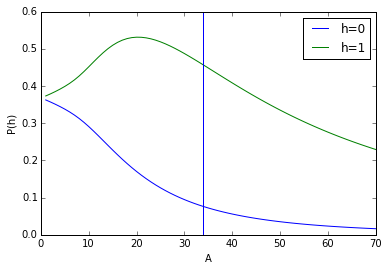

In [87]:
plt.plot(range(1,N0+1), [P(0, a) for a in range(1,N0+1)], label='h=0')
plt.plot(range(1,N0+1), [P(1, a) for a in range(1,N0+1)], label='h=1')
plt.xlabel('A')
plt.ylabel('P(h)')
plt.legend(loc='upper right')
plt.axvline((2*N0*u/tau)**(1/2))

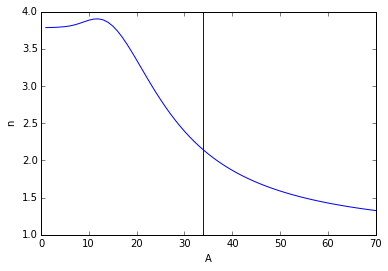

In [91]:
plt.plot(range(1,N0+1), [1/(1-P(0,a)-P(1,a)) for a in range(1,N0+1)])
plt.xlabel('A')
plt.ylabel('n')
plt.axvline((2*N0*u/tau)**(1/2))